### Credit Scoring Classification

Given a person's credit related information

Data: [Kaggle](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import preprocess as hp

In [2]:
labelled_data = pd.read_csv("data/labelled_data.csv")
unlabelled_data = pd.read_csv("data/unlabelled_data.csv")

In [3]:
print(f"Labelled Data Shape: {labelled_data.shape}, Unlabelled Data Shape: {unlabelled_data.shape}")

Labelled Data Shape: (100000, 28), Unlabelled Data Shape: (50000, 27)


In [4]:
labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
print(labelled_data.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [6]:
labelled_data.isna().mean() * 100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [7]:
labelled_data.iloc[:5, 0:10]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3


In [8]:
labelled_data.iloc[:2, 10:20]

,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
0,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98
1,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98


In [9]:
labelled_data.iloc[:2, 20:]

,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [10]:
categorical_features = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

In [11]:
dropfeatures = ['ID', 'Customer_ID', 'Name', 'SSN']

In [12]:
labelled_data["Credit_History_Age"].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

In [ ]:
import data_utils as hf
import importlib

importlib.reload(hf)

labelled_data['Credit_History_Age'] = labelled_data['Credit_History_Age'].apply(hf.convert_age_to_years)

In [14]:
new_labelled_data = labelled_data.drop(columns=dropfeatures)

In [15]:
numeric_features = [col for col in new_labelled_data.columns if col not in categorical_features]

print(numeric_features)

['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [16]:
new_labelled_data[numeric_features].head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,809.98,26.822620,22.08,49.574949,80.41529543900253,312.49408867943663
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.28022162236736,284.62916249607184
2,-500,19114.12,NaN,3,4,3,4,3,7,_,4.0,809.98,28.609352,22.25,49.574949,81.699521264648,331.2098628537912
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,809.98,31.377862,22.33,49.574949,199.4580743910713,223.45130972736786
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,22.42,49.574949,41.420153086217326,341.48923103222177


In [17]:
new_labelled_data[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   object 
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   fl

In [18]:
for col in numeric_features:
    new_labelled_data[col] = pd.to_numeric(new_labelled_data[col], errors='coerce')

new_labelled_data[numeric_features].dtypes

Age                         float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
dtype: object

In [19]:
# # Plotting a histogram
# plt.figure(figsize=(8, 6))
# plt.hist(ages_below_100, bins=20, color='skyblue', edgecolor='black') 
# plt.title('Distribution of Ages Below 100')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

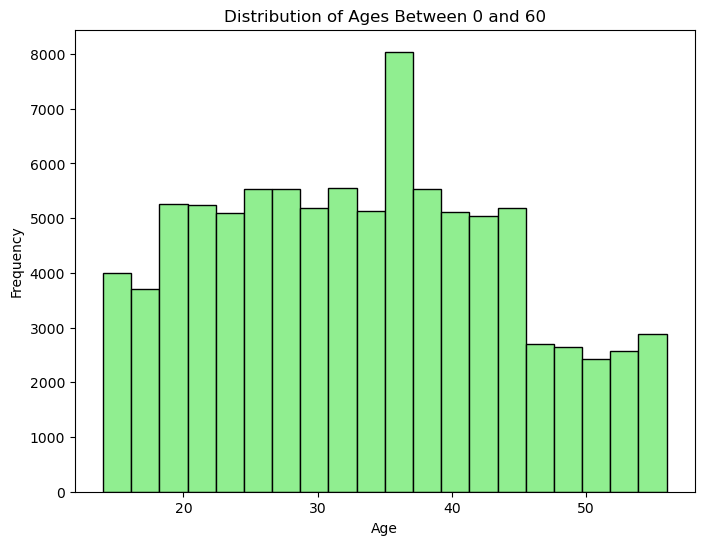

In [20]:
# Filtring ages between 0 and 60

ages_between_0_and_60 = new_labelled_data[(new_labelled_data["Age"] > 0) & (new_labelled_data["Age"] < 60)]["Age"]

plt.figure(figsize=(8, 6))
plt.hist(ages_between_0_and_60, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ages Between 0 and 60')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Filtering negative and extreme values in Age column

new_labelled_data = new_labelled_data[(new_labelled_data["Age"] > 0) & (new_labelled_data["Age"] < 60)].reset_index(drop=True)

# Filtering negative values in Delay_from_due_date column
new_labelled_data = new_labelled_data[new_labelled_data["Delay_from_due_date"] >= 0].reset_index(drop=True)

In [22]:
new_labelled_data.isna().mean()

Month                       0.000000
Age                         0.000000
Occupation                  0.000000
Annual_Income               0.070350
Monthly_Inhand_Salary       0.150220
Num_Bank_Accounts           0.000000
Num_Credit_Card             0.000000
Interest_Rate               0.000000
Num_of_Loan                 0.048077
Type_of_Loan                0.113079
Delay_from_due_date         0.000000
Num_of_Delayed_Payment      0.097340
Changed_Credit_Limit        0.020956
Num_Credit_Inquiries        0.019703
Credit_Mix                  0.000000
Outstanding_Debt            0.010108
Credit_Utilization_Ratio    0.000000
Credit_History_Age          0.090152
Payment_of_Min_Amount       0.000000
Total_EMI_per_month         0.000000
Amount_invested_monthly     0.087646
Payment_Behaviour           0.000000
Monthly_Balance             0.012177
Credit_Score                0.000000
dtype: float64

In [23]:
print(categorical_features)

['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [24]:
new_labelled_data["Type_of_Loan"].value_counts()

Type_of_Loan
Not Specified                                                                                                                            1283
Credit-Builder Loan                                                                                                                      1161
Personal Loan                                                                                                                            1157
Debt Consolidation Loan                                                                                                                  1148
Student Loan                                                                                                                             1127
                                                                                                                                         ... 
Credit-Builder Loan, Personal Loan, Debt Consolidation Loan, Payday Loan, Mortgage Loan, Home Equity Loan, Auto Loan, and Payday Loan  

In [25]:
# new_labelled_data[["Type_of_Loan", "Num_of_Loan"]].head(10)

new_labelled_data.loc[new_labelled_data["Type_of_Loan"] == "Not Specified", ["Type_of_Loan", "Num_of_Loan"]].head()

,Type_of_Loan,Num_of_Loan
21,Not Specified,1.0
22,Not Specified,1.0
23,Not Specified,1.0
24,Not Specified,1.0
25,Not Specified,1.0


In [26]:
new_labelled_data["Credit_Mix"].value_counts()

creditmix_mapping = {
    'Bad': 'Bad', 
    'Good': 'Good',
    'Standard': 'Standard',
    '_': 'NH'}

new_labelled_data["Credit_Mix"] = new_labelled_data["Credit_Mix"].map(creditmix_mapping)

new_labelled_data["Credit_Mix"].value_counts()

Credit_Mix
Standard    33769
Good        21993
NH          18539
Bad         17511
Name: count, dtype: int64

In [27]:
new_labelled_data["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    48360
No     32399
NM     11053
Name: count, dtype: int64

In [28]:
new_labelled_data["Payment_Behaviour"].value_counts()

payment_behaviour_mapping = {
    'Low_spent_Small_value_payments': 'LSSP',
    'Low_spent_Large_value_payments': 'LSLP',
    'High_spent_Small_value_payments': 'HSSP',
    'High_spent_Large_value_payments': 'HSLP',
    '!@9#%8': 'NPB'
}

new_labelled_data["Payment_Behaviour"] = new_labelled_data["Payment_Behaviour"].map(payment_behaviour_mapping)

new_labelled_data["Payment_Behaviour"].value_counts()

Payment_Behaviour
LSSP    23447
HSLP    12554
HSSP    10431
LSLP     9552
NPB      6972
Name: count, dtype: int64

In [29]:
categorical_data = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [31]:
new_labelled_data['Credit_Score'].value_counts()

Credit_Score
Standard    48984
Poor        26777
Good        16051
Name: count, dtype: int64

In [ ]:
df = hp.preprocess_data(labelled_data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91812 entries, 0 to 91811
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     91812 non-null  object 
 1   Age                       91812 non-null  float64
 2   Occupation                91812 non-null  object 
 3   Annual_Income             85353 non-null  float64
 4   Monthly_Inhand_Salary     78020 non-null  float64
 5   Num_Bank_Accounts         91812 non-null  int64  
 6   Num_Credit_Card           91812 non-null  int64  
 7   Interest_Rate             91812 non-null  int64  
 8   Num_of_Loan               87398 non-null  float64
 9   Type_of_Loan              81430 non-null  object 
 10  Delay_from_due_date       91812 non-null  int64  
 11  Num_of_Delayed_Payment    82875 non-null  float64
 12  Changed_Credit_Limit      89888 non-null  float64
 13  Num_Credit_Inquiries      90003 non-null  float64
 14  Credit

In [36]:
new_labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91812 entries, 0 to 91811
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     91812 non-null  object 
 1   Age                       91812 non-null  float64
 2   Occupation                91812 non-null  object 
 3   Annual_Income             85353 non-null  float64
 4   Monthly_Inhand_Salary     78020 non-null  float64
 5   Num_Bank_Accounts         91812 non-null  int64  
 6   Num_Credit_Card           91812 non-null  int64  
 7   Interest_Rate             91812 non-null  int64  
 8   Num_of_Loan               87398 non-null  float64
 9   Type_of_Loan              81430 non-null  object 
 10  Delay_from_due_date       91812 non-null  int64  
 11  Num_of_Delayed_Payment    82875 non-null  float64
 12  Changed_Credit_Limit      89888 non-null  float64
 13  Num_Credit_Inquiries      90003 non-null  float64
 14  Credit

In [42]:
new_labelled_data.groupby('Occupation')[["Annual_Income", "Monthly_Inhand_Salary"]].mean()

,Annual_Income,Monthly_Inhand_Salary
Occupation,,
Accountant,185562.899658,4226.391246
Architect,171557.167454,4271.673362
Developer,186711.779531,4141.660554
Doctor,192373.124882,4111.270629
Engineer,175550.328324,4237.552950
Entrepreneur,184424.364347,4218.149522
Journalist,164268.803963,3994.360234
Lawyer,193835.523503,4110.660620
Manager,174563.826100,4269.979835


In [30]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_data)
    ])

In [37]:
X = new_labelled_data.drop(['Credit_Score', 'Month', 'Type_of_Loan', 'Occupation'], axis=1)
y = new_labelled_data['Credit_Score']

X_processed = preprocessor.fit_transform(X)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_encoded

array([0, 0, 0, ..., 1, 2, 1])

In [44]:
pd.Series(y_encoded).value_counts()

2    48984
1    26777
0    16051
Name: count, dtype: int64

- 2 - Standard
- 1 - Poor
- 0 - Good

In [39]:
feature_names = preprocessor.get_feature_names_out()

transformed_data = pd.DataFrame(X_processed, columns=feature_names)

In [40]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91812 entries, 0 to 91811
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   num__Age                        91812 non-null  float64
 1   num__Annual_Income              91812 non-null  float64
 2   num__Monthly_Inhand_Salary      91812 non-null  float64
 3   num__Num_Bank_Accounts          91812 non-null  float64
 4   num__Num_Credit_Card            91812 non-null  float64
 5   num__Interest_Rate              91812 non-null  float64
 6   num__Num_of_Loan                91812 non-null  float64
 7   num__Delay_from_due_date        91812 non-null  float64
 8   num__Num_of_Delayed_Payment     91812 non-null  float64
 9   num__Changed_Credit_Limit       91812 non-null  float64
 10  num__Num_Credit_Inquiries       91812 non-null  float64
 11  num__Outstanding_Debt           91812 non-null  float64
 12  num__Credit_Utilization_Ratio   

In [45]:
# Model Building
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [46]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Training Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.7721
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      3210
           1       0.77      0.77      0.77      5356
           2       0.80      0.80      0.80      9797

    accuracy                           0.77     18363
   macro avg       0.76      0.76      0.76     18363
weighted avg       0.77      0.77      0.77     18363



In [48]:
# Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.6780
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      3210
           1       0.67      0.66      0.66      5356
           2       0.72      0.72      0.72      9797

    accuracy                           0.68     18363
   macro avg       0.65      0.65      0.65     18363
weighted avg       0.68      0.68      0.68     18363



In [49]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Accuracy: 0.7421
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      3210
           1       0.75      0.70      0.72      5356
           2       0.77      0.78      0.77      9797

    accuracy                           0.74     18363
   macro avg       0.72      0.72      0.72     18363
weighted avg       0.74      0.74      0.74     18363



In [50]:
# Checking feature importance from Random Forest
importances = rf_model.feature_importances_ 
indices = np.argsort(importances)[::-1]
# Displaying the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. feature 11 (0.11049189090071884)
2. feature 5 (0.08170491813568827)
3. feature 7 (0.06668174813770956)
4. feature 9 (0.059785998259621984)
5. feature 13 (0.055342177082164754)
6. feature 16 (0.0477159207770701)
7. feature 15 (0.04726898411505521)
8. feature 12 (0.046301213025767035)
9. feature 14 (0.044636278655360864)
10. feature 10 (0.0445229775125642)
11. feature 2 (0.042931737500020224)
12. feature 1 (0.04219467170893929)
13. feature 0 (0.03972305431133905)
14. feature 4 (0.03944525783722243)
15. feature 8 (0.03904120654651194)
16. feature 18 (0.03588570272899414)
17. feature 3 (0.031615438693139715)
18. feature 20 (0.02563378246076399)
19. feature 6 (0.025297264258847943)
20. feature 22 (0.015789399247404995)
21. feature 23 (0.013592200355440122)
22. feature 17 (0.009940986713752282)
23. feature 27 (0.007151298579251733)
24. feature 19 (0.006074980246096568)
25. feature 25 (0.004611664115892167)
26. feature 26 (0.0044578460539118694)
27. feature 24 (0.004375046

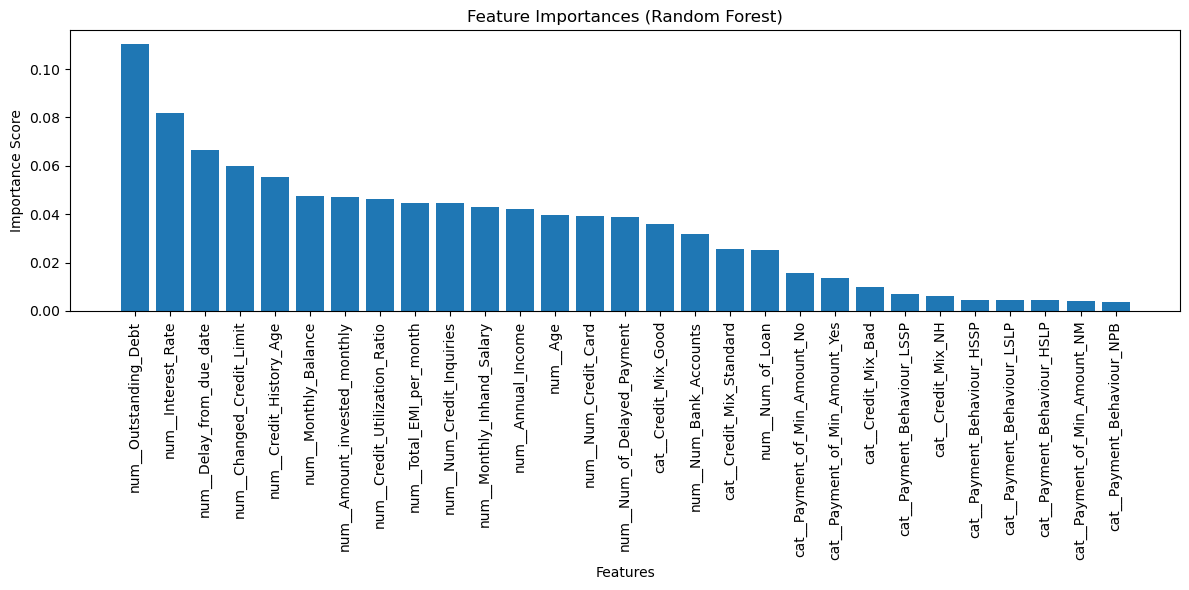

In [51]:
# Plotting feature importances

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances (Random Forest)")

plt.bar(
    range(X_train.shape[1]),
    importances[indices]
)

plt.xticks(
    range(X_train.shape[1]),
    [feature_names[i] for i in indices],
    rotation=90
)

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [54]:
# Hyperparameter Tuning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs= 1
)

rf_random.fit(X_train, y_train)
best_rf_model = rf_random.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Tuned Random Forest Classifier Accuracy: {accuracy_best_rf:.4f}")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   9.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  24.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  23.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  23.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  12.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time

In [55]:
# Hyperparameter Tuning using RandomizedSearchCV for XGBoost

param_dist_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs= 1
)

xgb_random.fit(X_train, y_train)
best_xgb_model = xgb_random.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Tuned XGBoost Classifier Accuracy: {accuracy_best_xgb:.4f}")
print(classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.6; total time=  17.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.6; total time=  18.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.6; total time=  18.7s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.9s
[CV] END cols

In [56]:
# Hyperparameter Tuning using RandomizedSearchCV for Decision Tree

param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_random = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist_dt,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs= 1
)

dt_random.fit(X_train, y_train)
best_dt_model = dt_random.best_estimator_ 
y_pred_best_dt = best_dt_model.predict(X_test)

accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Tuned Decision Tree Classifier Accuracy: {accuracy_best_dt:.4f}")
print(classification_report(y_test, y_pred_best_dt))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   1.2s
[CV] END max_depth=3

In [62]:
# # Explaining Model Predictions using SHAP

# import shap

# explainer = shap.Explainer(best_xgb_model, X_train)
# shap_values = explainer(X_test)

# shap.summary_plot(shap_values, X_test, feature_names=feature_names)